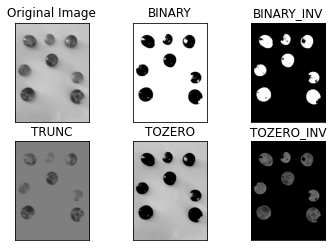

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('appleorange.jpg',0)
plt.imshow(img)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

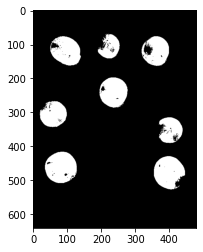

In [5]:
# inverser l'image 
imgINV= abs(thresh1 - 255)
plt.imshow(imgINV, cmap='gray')

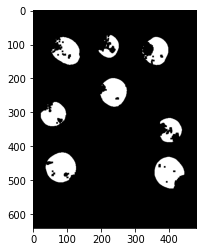

In [7]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(imgINV,kernel,iterations = 1)
plt.imshow(erosion, cmap='gray')

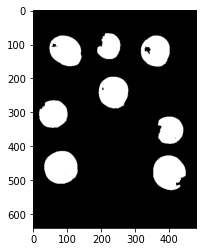

In [9]:
dilation = cv.dilate(imgINV,kernel,iterations = 1)
plt.imshow(dilation, cmap='gray')

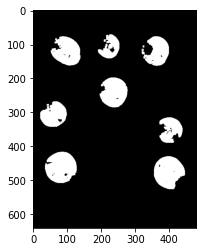

In [10]:
opening = cv.morphologyEx(imgINV, cv.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

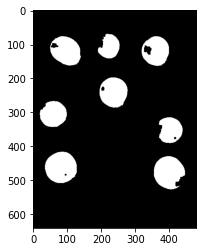

In [12]:
closing = cv.morphologyEx(imgINV, cv.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

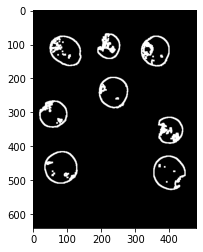

In [13]:
#difference entre dilation et erosin
gradient = cv.morphologyEx(imgINV, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient, cmap='gray')

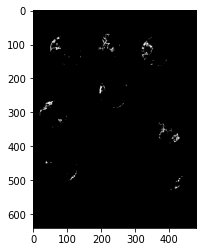

In [14]:
#difference entre opening et original
tophat = cv.morphologyEx(imgINV, cv.MORPH_TOPHAT, kernel)
plt.imshow(tophat, cmap='gray')

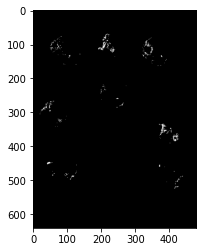

In [15]:
#difference entre closing et original
blackhat = cv.morphologyEx(imgINV, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat, cmap='gray')

In [16]:
# Rectangular Kernel
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [17]:
# Elliptical Kernel
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))


array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [18]:
# Cross-shaped Kernel
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Dilatation avec element structurant

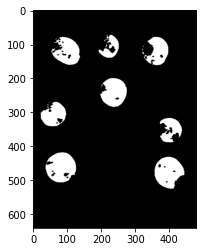

In [19]:
erosion = cv.erode(imgINV,cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)),iterations = 1)
plt.imshow(erosion, cmap='gray')